In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'C:\\users\\JYIN\\Customer_Arrears'

In [4]:
os.chdir('H:\\Desktop')

In [5]:
newdata = pd.read_csv('FINALS.csv')

In [6]:
newdata.head()

,KY_BA,Account_Age_Mar,Account_Age_Apr,Account_Age_May,usage3,usage4,usage5,chgrt3,chgrt4,chgrt5,...,FL_EBILL,CD_AD_TYPE,SQFT_Code,SQFT_Desc,mo3,mo4,mo5,DD3,DD4,DD5
0,100925,6.846575,6.928767,7.013699,12000.0,10800.0,9000.0,0.111111,-0.100000,-0.166667,...,N,M,6.0,"20,000 - 39,999",2200.56,2007.88,1698.36,0,0,0
1,101020,1.210959,1.293151,1.378082,167244.0,105544.0,103471.0,-0.078469,-0.368922,-0.019641,...,M,M,7.0,"40,000 - 99,999",0.00,15607.90,13385.13,0,0,0
2,101646,2.123288,2.205479,2.290411,168898.0,106447.0,102988.0,-0.047383,-0.369756,-0.032495,...,M,M,1.0,"0 - 1,499",22444.97,7523.33,0.00,0,0,0
3,102401,22.915068,22.997260,23.082192,52489.0,45266.0,59314.0,-0.231651,-0.137610,0.310343,...,D,M,7.0,"40,000 - 99,999",3181.58,3097.32,0.00,0,0,1
4,102554,16.715068,16.797260,16.882192,61200.0,34500.0,21900.0,-0.055556,-0.436275,-0.365217,...,D,M,3.0,"2,500 - 4,999",7348.08,0.00,0.00,0,0,1


In [7]:
newdata.isnull().sum()

KY_BA                   0
Account_Age_Mar         0
Account_Age_Apr         0
Account_Age_May         0
usage3              23307
usage4              20178
usage5              17163
chgrt3              39860
chgrt4              36395
chgrt5              34052
sgmt                    0
GPC_Region          12653
CD_CREDIT_RATING    12878
FL_EBILL                0
CD_AD_TYPE              0
SQFT_Code           98428
SQFT_Desc           98428
mo3                     0
mo4                     0
mo5                     0
DD3                     0
DD4                     0
DD5                     0
dtype: int64

In [9]:
# imputation on several columns, fillna(0))
newdata[['usage3', 'usage4', 'usage5', 'chgrt3', 'chgrt4', 'chgrt5']] = newdata[['usage3', 'usage4', 'usage5', 'chgrt3', 'chgrt4', 'chgrt5']].fillna(0)

In [10]:
newdata['GPC_Region'].fillna('Missing', inplace = True)

In [15]:
def Credit_Rating(c):
  if c['CD_CREDIT_RATING'] == 'A':
    return 1
  elif c['CD_CREDIT_RATING'] == 'B':
    return 2
  elif c['CD_CREDIT_RATING'] == 'C':
    return 3
  elif c['CD_CREDIT_RATING'] == 'D':
    return 4
  else:
    return None
    
newdata['Credit_Rating'] = newdata.apply(Credit_Rating, axis=1)


In [16]:
newdata['Credit_Rating'].isnull().sum()

12878

In [12]:
newdata.groupby(by = 'CD_CREDIT_RATING', as_index = False).agg({'KY_BA': pd.Series.nunique})

,CD_CREDIT_RATING,KY_BA
0,A,275183
1,B,5692
2,C,4363
3,D,24247
4,Missing,12878


In [19]:
sgmt_list = list(set(newdata['sgmt']))

In [20]:
# sort list  
# essential for grouping 
sgmt_list.sort() 

In [21]:
gov_group = sgmt_list[7:9]
manu_list = sgmt_list[12:22]
manu_list

['Mfg. Automotive',
 'Mfg. Chemicals',
 'Mfg. Fabricated Metal and Machinery',
 'Mfg. Food & Beverage',
 'Mfg. Forest Products',
 'Mfg. Light Manufacturing',
 'Mfg. Plastics & Rubber',
 'Mfg. Primary Metal',
 'Mfg. Stone, Clay, and Glass',
 'Mfg. Textile & Apparel']

In [22]:
newdata['newsgmt1'] = np.where(newdata['sgmt'].isin(gov_group), "Government", newdata['sgmt'])
newdata['newsgmt2'] = np.where(newdata['newsgmt1'].isin(["Other", "Other Information", "Missing"]), "Other", newdata['newsgmt1'])
newdata['newsgmt3'] = np.where(newdata['newsgmt2'].isin(["Utility-Electricity", "Utility-Gas", "Utility-Water or Wastewater"]), "Utility", newdata['newsgmt2'])
newdata['newsgmt4'] = np.where(newdata['newsgmt3'].isin(["Data Centers", "Web Service"]), "Data Center & Web Service", newdata['newsgmt3'])

In [23]:
newdata['newsgmt5'] = np.where(newdata['newsgmt4'].isin(manu_list), "Manufacturing", newdata['newsgmt4'])

In [25]:
# Create a groupby object: by_sgmt_class
by_newsgmt5 = newdata.groupby(['newsgmt5'])

# # Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# # Impute SQFT_Code and assign to missing SQFT_Code
newdata.SQFT_Code = by_newsgmt5.SQFT_Code.transform(impute_median)
# # Impute SQFT_Code and assign to missing SQFT_Code
newdata.Credit_Rating = by_newsgmt5.Credit_Rating.transform(impute_median)

In [26]:
newdata.isna().sum()

KY_BA                   0
Account_Age_Mar         0
Account_Age_Apr         0
Account_Age_May         0
usage3                  0
usage4                  0
usage5                  0
chgrt3                  0
chgrt4                  0
chgrt5                  0
sgmt                    0
GPC_Region              0
CD_CREDIT_RATING    12878
FL_EBILL                0
CD_AD_TYPE              0
SQFT_Code               0
SQFT_Desc           98428
mo3                     0
mo4                     0
mo5                     0
DD3                     0
DD4                     0
DD5                     0
Credit_Rating           0
newsgmt1                0
newsgmt2                0
newsgmt3                0
newsgmt4                0
newsgmt5                0
dtype: int64

In [27]:
data_Mar = newdata[['Account_Age_Mar','usage3','chgrt3', 'SQFT_Code', 'mo3', 'Credit_Rating', 'newsgmt5', 'GPC_Region',\
                    'FL_EBILL', 'CD_AD_TYPE']]
data_Mar["In_Arrears"] = np.where(newdata['DD4']>1, 1,newdata['DD4'])
data_Mar.columns = ['Account_Age','electricity_monthly_usage','chgrt', 'SQFT_Code', 'mothly_Payment', 'Credit_Rating', \
                    'sgmt', 'GPC_Region', 'FL_EBILL', 'CD_AD_TYPE', 'In_Arrears']


In [28]:
data_Mar["In_Arrears"].value_counts()

0    289866
1     32497
Name: In_Arrears, dtype: int64

In [29]:
data_Apr = newdata[['Account_Age_Apr','usage4','chgrt4', 'SQFT_Code', 'mo4', 'Credit_Rating', 'newsgmt5', 'GPC_Region', \
                    'FL_EBILL', 'CD_AD_TYPE']]
data_Apr["In_Arrears"] = np.where(newdata['DD5']>1, 1,newdata['DD5'])
data_Apr.columns = ['Account_Age','electricity_monthly_usage','chgrt', 'SQFT_Code', 'mothly_Payment', 'Credit_Rating', \
                    'sgmt', 'GPC_Region', 'FL_EBILL', 'CD_AD_TYPE', 'In_Arrears']


In [30]:
#April Arrears Count
data_Apr["In_Arrears"].value_counts()

0    288877
1     33486
Name: In_Arrears, dtype: int64

In [31]:
data_May = newdata[['Account_Age_May','usage5','chgrt5', 'SQFT_Code', 'mo5', 'Credit_Rating', 'newsgmt5', 'GPC_Region',\
                    'FL_EBILL', 'CD_AD_TYPE']]
data_May.columns = ['Account_Age','electricity_monthly_usage','chgrt', 'SQFT_Code', 'mothly_Payment', 'Credit_Rating', 'sgmt', 'GPC_Region',\
                    'FL_EBILL', 'CD_AD_TYPE']

In [32]:
Training_Data = pd.concat([data_Mar, data_Apr], ignore_index=True)

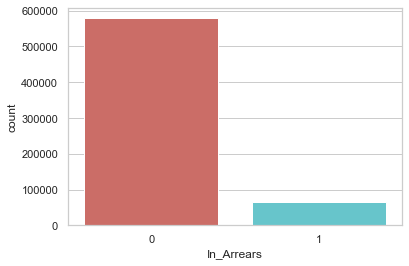

<Figure size 432x288 with 0 Axes>

In [33]:
sns.countplot(x = 'In_Arrears', data = Training_Data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [34]:
count_no_arr = len(Training_Data[Training_Data['In_Arrears']==0])
count_arr = len(Training_Data[Training_Data['In_Arrears']==1])
pct_of_no_arr = count_no_arr/(count_no_arr+count_arr)
print("percentage of non arrears is", pct_of_no_arr*100)
pct_of_arr = count_arr/(count_no_arr+count_arr)
print("percentage of arrears", pct_of_arr*100)

percentage of non arrears is 89.76572993798916
percentage of arrears 10.23427006201084


In [35]:
Training_Data.groupby('In_Arrears').mean()

,Account_Age,electricity_monthly_usage,chgrt,SQFT_Code,mothly_Payment,Credit_Rating
In_Arrears,,,,,,
0,12.771988,4862.924706,0.080273,3.266239,642.980661,1.168375
1,8.467752,3562.586969,0.051557,2.878514,331.964503,2.165027


In [36]:
Training_Data.groupby('sgmt').mean()

,Account_Age,electricity_monthly_usage,chgrt,SQFT_Code,mothly_Payment,Credit_Rating,In_Arrears
sgmt,,,,,,,
Agriculture,14.778958,3517.911737,1.158169,2.397659,342.860457,1.182854,0.066118
Amusement,12.453721,3510.178586,0.026013,3.667831,543.765834,1.348931,0.137240
Communications,15.362741,2450.793574,0.049186,3.151522,289.705860,1.020296,0.039517
Construction,7.017536,2033.862323,0.214933,3.073103,312.263672,1.214387,0.101857
Convenience Stores,9.595270,8919.000548,0.053159,2.177632,1076.598791,1.527961,0.128838
Data Center & Web Service,12.356208,71767.648148,-0.053657,3.232804,3943.125688,1.243386,0.097884
Education,13.194885,5920.652509,-0.071015,4.388582,837.021199,1.276373,0.098874
Government,17.957904,3571.124081,0.043967,4.853934,510.574554,1.078206,0.027974
Grocery,14.318473,23626.140838,0.184844,3.100959,2174.313776,1.362191,0.100707


In [37]:
Training_Data.groupby('GPC_Region').mean()

,Account_Age,electricity_monthly_usage,chgrt,SQFT_Code,mothly_Payment,Credit_Rating,In_Arrears
GPC_Region,,,,,,,
Missing,10.050156,0.156406,0.000051,3.023789,85.523441,1.006086,0.054453
Northeast,13.105021,4333.244579,0.013749,3.183236,563.932680,1.231229,0.089715
Northwest,10.935509,5745.895986,0.003037,3.278818,728.242825,1.309460,0.112608
Southeast,13.892020,3983.841277,0.107096,3.240643,542.766512,1.263643,0.099226
Southwest,14.634541,4032.908076,0.342731,3.155916,511.641775,1.266581,0.099859


In [38]:
Training_Data.groupby('FL_EBILL').mean()

,Account_Age,electricity_monthly_usage,chgrt,SQFT_Code,mothly_Payment,Credit_Rating,In_Arrears
FL_EBILL,,,,,,,
D,16.601816,10143.941869,-0.000242,3.500437,1039.836128,1.015102,0.011439
E,7.647970,4562.628035,0.054402,3.003403,632.670580,1.471647,0.148590
F,26.734247,748.500000,-0.157178,3.000000,104.670000,3.000000,0.000000
I,12.482877,14154.325000,0.019149,3.450000,2055.708000,1.250000,0.000000
M,24.946979,5963.920131,0.046446,3.319068,686.224109,1.212260,0.078383
N,8.114553,2963.056153,0.123795,3.249399,461.397149,1.239718,0.107957


In [39]:
Training_Data.groupby('CD_AD_TYPE').mean()

,Account_Age,electricity_monthly_usage,chgrt,SQFT_Code,mothly_Payment,Credit_Rating,In_Arrears
CD_AD_TYPE,,,,,,,
C,11.754265,4878.884912,0.119049,3.496436,578.988074,1.103215,0.069474
L,2.657449,434.278155,0.113956,3.266990,90.345694,1.111650,0.087864
M,13.676504,5103.088463,0.097481,3.283840,653.672518,1.236745,0.090874
P,9.543135,3652.227991,-0.024021,2.779207,542.646662,1.544225,0.168899
Y,17.272027,4280.300725,0.406391,3.195652,584.854855,1.355072,0.088164


(6.0, 0.0)

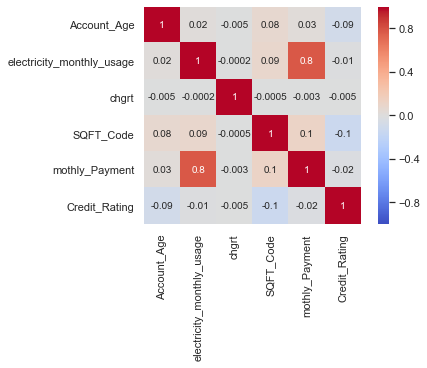

In [41]:
df = Training_Data.iloc[:,0:6]
hm = sns.heatmap(df.corr(), fmt='.1g', annot = True, vmin=-1, vmax=1, cmap = 'coolwarm', square = True)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)


In [42]:
X = Training_Data.iloc[:,:-1]
X.head()

,Account_Age,electricity_monthly_usage,chgrt,SQFT_Code,mothly_Payment,Credit_Rating,sgmt,GPC_Region,FL_EBILL,CD_AD_TYPE
0,6.846575,12000.0,0.111111,6.0,2200.56,1.0,Manufacturing,Southeast,N,M
1,1.210959,167244.0,-0.078469,7.0,0.00,1.0,Office/Real Estate,Northwest,M,M
2,2.123288,168898.0,-0.047383,1.0,22444.97,1.0,Office/Real Estate,Northwest,M,M
3,22.915068,52489.0,-0.231651,7.0,3181.58,1.0,Hotels/Lodging,Northwest,D,M
4,16.715068,61200.0,-0.055556,3.0,7348.08,1.0,Retail/Mercantile,Northwest,D,M


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X): 
    # Calculating VIF 
    vif = pd.DataFrame()
    vif["variables"] = X.columns 
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
    return(vif) 

In [44]:
calc_vif(X.iloc[:,:6])

,variables,VIF
0,Account_Age,1.751377
1,electricity_monthly_usage,2.577374
2,chgrt,1.000111
3,SQFT_Code,2.521835
4,mothly_Payment,2.701658
5,Credit_Rating,2.071392


In [46]:
cat_vars = list(X.columns[6:])
cat_vars

['sgmt', 'GPC_Region', 'FL_EBILL', 'CD_AD_TYPE']

In [47]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X[var], prefix = var)
    data1 = pd.concat([X, cat_list], axis = 1)
    X = data1

In [91]:
X.head()

,Account_Age,electricity_monthly_usage,chgrt,SQFT_Code,mothly_Payment,Credit_Rating,sgmt,GPC_Region,FL_EBILL,CD_AD_TYPE,...,FL_EBILL_E,FL_EBILL_F,FL_EBILL_I,FL_EBILL_M,FL_EBILL_N,CD_AD_TYPE_C,CD_AD_TYPE_L,CD_AD_TYPE_M,CD_AD_TYPE_P,CD_AD_TYPE_Y
0,6.846575,12000.0,0.111111,6.0,2200.56,1.0,Manufacturing,Southeast,N,M,...,0,0,0,0,1,0,0,1,0,0
1,1.210959,167244.0,-0.078469,7.0,0.00,1.0,Office/Real Estate,Northwest,M,M,...,0,0,0,1,0,0,0,1,0,0
2,2.123288,168898.0,-0.047383,1.0,22444.97,1.0,Office/Real Estate,Northwest,M,M,...,0,0,0,1,0,0,0,1,0,0
3,22.915068,52489.0,-0.231651,7.0,3181.58,1.0,Hotels/Lodging,Northwest,D,M,...,0,0,0,0,0,0,0,1,0,0
4,16.715068,61200.0,-0.055556,3.0,7348.08,1.0,Retail/Mercantile,Northwest,D,M,...,0,0,0,0,0,0,0,1,0,0


In [92]:
data_vars = X.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [93]:
X_Train=X[to_keep]

In [94]:
Train_Label = Training_Data['In_Arrears']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_Train, Train_Label, test_size=0.3, random_state=0)

In [96]:
#SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['In_Arrears'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-arrears in oversampled data",len(os_data_y[os_data_y['In_Arrears']==0]))
print("Number of arrears in oversampled data",len(os_data_y[os_data_y['In_Arrears']==1]))
print("Proportion of non-arrears data in oversampled data is ",len(os_data_y[os_data_y['In_Arrears']==0])/len(os_data_X))
print("Proportion of arrears data in oversampled data is ",len(os_data_y[os_data_y['In_Arrears']==1])/len(os_data_X))

length of oversampled data is  810332
Number of non-arrears in oversampled data 405166
Number of arrears in oversampled data 405166
Proportion of non-arrears data in oversampled data is  0.5
Proportion of arrears data in oversampled data is  0.5


In [97]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.317526
         Iterations: 35
                                       Results: Logit
Model:                       Logit                     Pseudo R-squared:          0.542      
Dependent Variable:          In_Arrears                AIC:                       514691.3016
Date:                        2020-06-22 12:23          BIC:                       515201.9304
No. Observations:            810332                    Log-Likelihood:            -2.5730e+05
Df Model:                    43                        LL-Null:                   -5.6168e+05
Df Residuals:                810288                    LLR p-value:               0.0000     
Converged:                   0.0000                    Scale:                     1.0000     
No. Iterations:              35.0000                                                         
---------------------------------------------------------------------------------------------
                                Co

In [98]:
cols_drop = ['FL_EBILL_E', 'FL_EBILL_F', 'FL_EBILL_I', 'electricity_monthly_usage']
os_X = os_data_X.drop(columns=cols_drop)
logit_model2=sm.Logit(os_data_y, os_X)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.318238
         Iterations 8
                                 Results: Logit
Model:                    Logit                Pseudo R-squared:     0.541      
Dependent Variable:       In_Arrears           AIC:                  515837.5466
Date:                     2020-06-22 12:23     BIC:                  516301.7546
No. Observations:         810332               Log-Likelihood:       -2.5788e+05
Df Model:                 39                   LL-Null:              -5.6168e+05
Df Residuals:             810292               LLR p-value:          0.0000     
Converged:                1.0000               Scale:                1.0000     
No. Iterations:           8.0000                                                
--------------------------------------------------------------------------------
                                Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------

In [99]:
feature_name = os_X.columns.values.tolist()

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C = 15)
logreg.fit(os_X, os_data_y)

LogisticRegression(C=15)

In [101]:
X_testd = X_test.drop(columns=cols_drop)
y_test_pred = logreg.predict(X_testd)
y_train_pred = logreg.predict(os_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_testd, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[161337  12240]
 [ 11350   8491]]


Recall: Recall gives us an idea about when it's actually yes, how often does it predict yes.\
Precision: Precision tells us about when it predicts yes, how often it is correct.\
F-measure: (2*Recall*Precision)/(Recall+Precision).\
High recall, low precision: This means that most of the positive examples are correctly recognized (Low FN) but there are a lot of false positive.\
Low recall, high precision: This shows that we miss a lof of positive examples(high FN) but those we predict positive are indeed positive (low FP).\
F-measure: Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or Recall.

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    173577
           1       0.41      0.43      0.42     19841

    accuracy                           0.88    193418
   macro avg       0.67      0.68      0.68    193418
weighted avg       0.88      0.88      0.88    193418



ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s AS 0s and 1s as 1s.

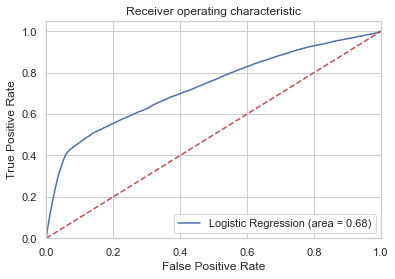

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_testd))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_testd)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [105]:
coefs = np.reshape(np.round(logreg.coef_,5),(-1,1))

In [106]:
coef = pd.DataFrame()
coef['feature_name'] = feature_name
coef['coef'] = coefs
coef

,feature_name,coef
0,Account_Age,-0.01756
1,chgrt,-0.41018
2,SQFT_Code,0.19912
3,mothly_Payment,-0.00021
4,Credit_Rating,1.21786
5,sgmt_Agriculture,-0.09005
6,sgmt_Amusement,-0.17814
7,sgmt_Communications,-0.44001
8,sgmt_Construction,-0.39937
9,sgmt_Convenience Stores,-0.06037


In [107]:
logreg.intercept_

array([0.12751929])

In [108]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=42, class_weight = 'balanced')# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [109]:
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.92


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[169978   3599]
 [ 11667   8174]]


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    173577
           1       0.69      0.41      0.52     19841

    accuracy                           0.92    193418
   macro avg       0.82      0.70      0.74    193418
weighted avg       0.91      0.92      0.91    193418



Tree-specific feature importance measure and computes the average reduction in impurity across all trees in the forest due to each feature. That is, features that tend to split nodes closer to the root of a tree will result in a larger imporance value. When we plot the feature importance of all features below, we see that the most important feature accoring to the algorithm is monthly payment. (Monthly payment is the top feature contributing to the predictions of the model.) Node splits based on this feature on average result in a larger decrease of node impurity.

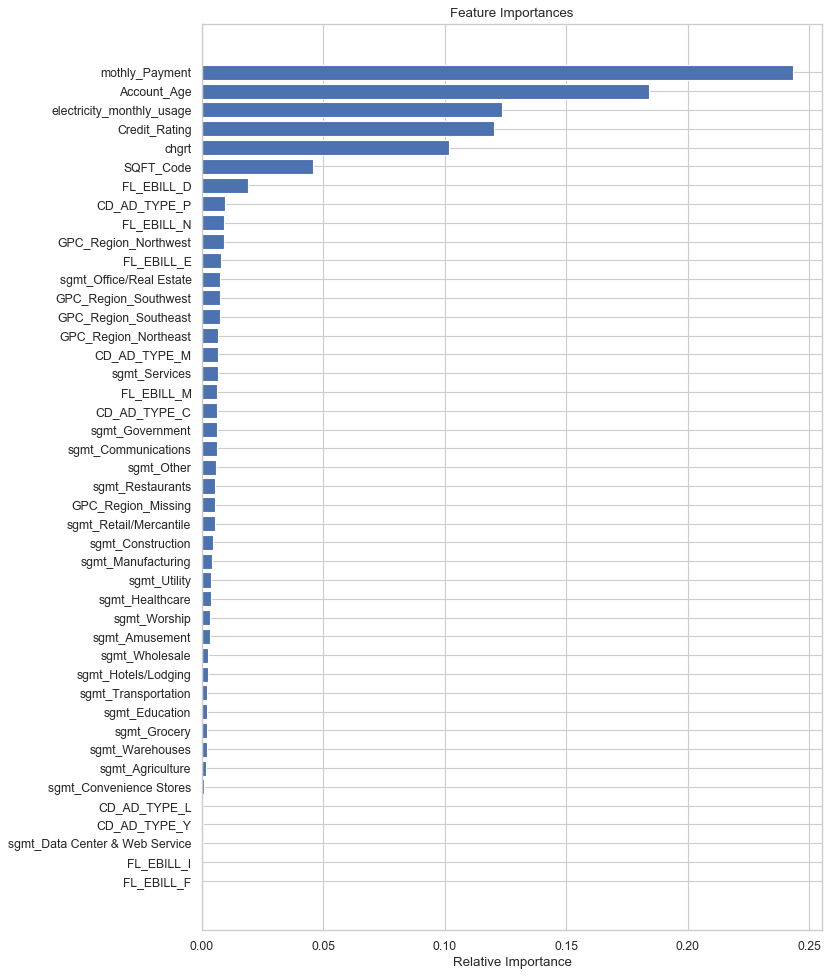

In [112]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 15), dpi=80, facecolor='w', edgecolor='k')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [113]:
rf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=42)# Train the model on training data
rf.fit(os_data_X, os_data_y)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [114]:
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.92


In [115]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[168434   5143]
 [ 10635   9206]]


In [116]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    173577
           1       0.64      0.46      0.54     19841

    accuracy                           0.92    193418
   macro avg       0.79      0.72      0.75    193418
weighted avg       0.91      0.92      0.91    193418



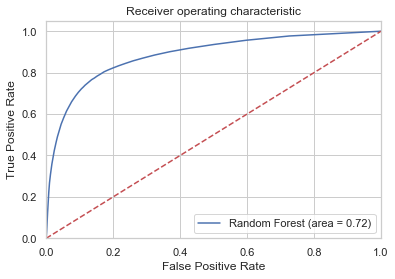

In [117]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [118]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=0)
ab.fit(os_data_X, os_data_y)

AdaBoostClassifier(random_state=0)

In [119]:
y_pred = ab.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[161857  11720]
 [ 10051   9790]]


In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94    173577
           1       0.46      0.49      0.47     19841

    accuracy                           0.89    193418
   macro avg       0.70      0.71      0.71    193418
weighted avg       0.89      0.89      0.89    193418



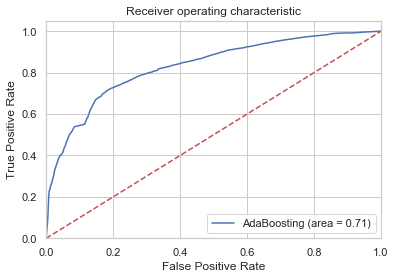

In [149]:
ab_roc_auc = roc_auc_score(y_test, ab.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ab.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoosting (area = %0.2f)' % ab_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AB_ROC')
plt.show()

In [123]:
import xgboost as xgb
xb = xgb.XGBClassifier(learning_rate = 0.1, alpha = 1,random_state = 0)
xb.fit(X_train, y_train)

XGBClassifier(alpha=1)

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[161857  11720]
 [ 10051   9790]]


In [125]:
y_pred = xb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    173577
           1       0.74      0.33      0.45     19841

    accuracy                           0.92    193418
   macro avg       0.83      0.66      0.70    193418
weighted avg       0.91      0.92      0.90    193418



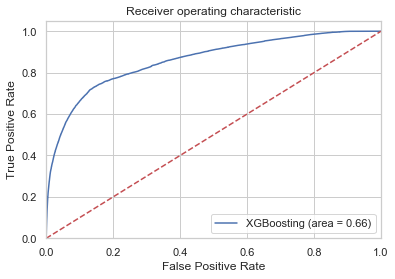

In [148]:
xb_roc_auc = roc_auc_score(y_test, xb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoosting (area = %0.2f)' % xb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XB1_ROC')
plt.show()

In [142]:
xb2 = xgb.XGBClassifier(n_estimator = 20, learning_rate = 0.1, alpha = 1, random_state = 0)
xb2.fit(os_data_X, os_data_y)

XGBClassifier(alpha=1, n_estimator=20)

In [143]:
y_pred = xb2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    173577
           1       0.48      0.55      0.51     19841

    accuracy                           0.89    193418
   macro avg       0.71      0.74      0.72    193418
weighted avg       0.90      0.89      0.90    193418



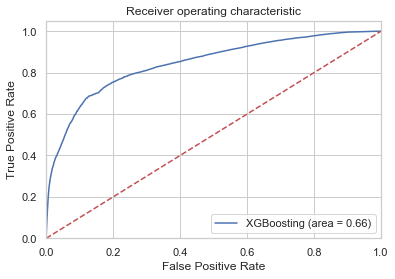

In [147]:
xb2_roc_auc = roc_auc_score(y_test, xb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xb2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoosting (area = %0.2f)' % xb2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XB1_ROC')
plt.show()

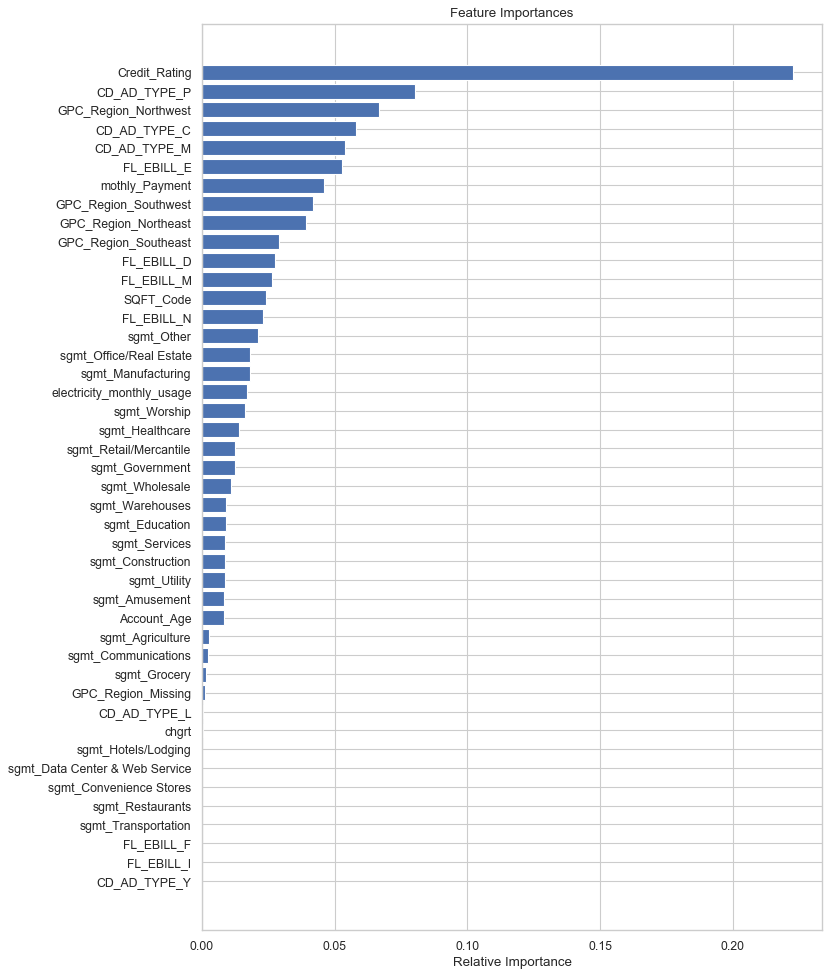

In [144]:
features = X_train.columns
importances = xb2.feature_importances_
indices = np.argsort(importances)
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 15), dpi=80, facecolor='w', edgecolor='k')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()